In [1]:
### Checking the data

In [2]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [57]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
from nltk.tag import pos_tag
from sklearn.neighbors import KNeighborsRegressor
import random


In [4]:
df= pd.read_csv("wine_dataset.csv")

In [5]:
df.head()

,id,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [6]:
# Checking the top 15 countries in terms of wine presence in the dataset

country_values = df.groupby('country')['country'].count().sort_values(ascending=False)
country_values[:15]

country
US              54504
France          22093
Italy           19540
Spain            6645
Portugal         5691
Chile            4472
Argentina        3800
Austria          3345
Australia        2329
Germany          2165
New Zealand      1419
South Africa     1401
Israel            505
Greece            466
Canada            257
Name: country, dtype: int64

In [7]:
countries_to_keep = ['US','France', 'Italy','Spain','Portugal','Chile','Argentina', 'Austria', 'Australia','Germany','New Zealand', 'South Africa', 'Israel','Greece','Canada']

In [8]:
filtered_df = df[df['country'].isin(countries_to_keep)]

In [9]:
# Checking unique varieties of wines
unique_varieties = filtered_df['variety'].unique()
len(unique_varieties)

647

--- Data Cleaning

In [10]:
import nltk
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/mercedes/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

Cleaning of the descritions and NLP application

In [11]:
# Cleaning the descriptions of each wine for NLP preparation

from nltk import pos_tag
from nltk.stem import WordNetLemmatizer

def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('N'):
        return 'n'
    elif treebank_tag.startswith('V'):
        return 'v'
    elif treebank_tag.startswith('R'):
        return 'r'
    elif treebank_tag.startswith('J'):
        return 'a'
    else:
        return 'n'

def cleaning(sentence):


    sentence = sentence.strip() ## remove whitespaces
    sentence = sentence.lower() ## lowercase
    sentence = ''.join(char for char in sentence if not char.isdigit()) ## remove numbers


    for punctuation in string.punctuation:
        sentence = sentence.replace(punctuation, '') ## remove punctuation

    tokenized_sentence = word_tokenize(sentence) ## tokenize
    stop_words = set(stopwords.words('english')) ## define stopwords

    tokenized_sentence_cleaned = [ ## remove stopwords
        w for w in tokenized_sentence if not w in stop_words
    ]

    lemmatized = [
        WordNetLemmatizer().lemmatize(word, pos=get_wordnet_pos(pos_tag))
        for word, pos_tag in pos_tag(tokenized_sentence_cleaned)
    ]


    cleaned_sentence = ' '.join(word for word in lemmatized)

    return cleaned_sentence

In [12]:
df["processed_description"] = df["description"].apply(cleaning)

In [13]:
# Applying TfidfVectorizer to check the most relevant words

tfidf_vectorizer = TfidfVectorizer(min_df = 1500)

# Fit and transform the processed descriptions
tfidf_matrix = tfidf_vectorizer.fit_transform(df['processed_description'])

In [14]:
vectorized_documents = pd.DataFrame(tfidf_matrix.toarray(),columns = tfidf_vectorizer.get_feature_names_out())
vectorized_documents

,accent,acid,acidity,add,aftertaste,age,alcohol,almond,almost,along,...,wine,winery,wood,would,year,yellow,yet,young,zest,zesty
0,0.0,0.0,0.150897,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.168708,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,...,0.121199,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.210109,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,...,0.150941,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,...,0.131009,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,0.0,0.0,0.195145,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.362108,0.0,0.0,0.0
129967,0.0,0.0,0.000000,0.0,0.00000,0.265144,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
129968,0.0,0.0,0.000000,0.0,0.00000,0.275050,0.0,0.0,0.0,0.0,...,0.274089,0.0,0.0,0.0,0.297492,0.0,0.000000,0.0,0.0,0.0
129969,0.0,0.0,0.136254,0.0,0.00000,0.196455,0.0,0.0,0.0,0.0,...,0.097884,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0


In [15]:
tfidf_vectorizer_results = list(vectorized_documents.columns)

In [16]:
# Applying N-grams to check the most relevant single words and pair of words


from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer_n_gram = CountVectorizer(ngram_range = (1,2), min_df=0.02, max_df = 0.40) # BI-GRAMS
descriptions_vectorized_n_gram = count_vectorizer_n_gram.fit_transform(df['processed_description'])

# Show the representations in a nice DataFrame
descriptions_vectorized_n_gram = pd.DataFrame(
    descriptions_vectorized_n_gram.toarray(),
    columns = count_vectorizer_n_gram.get_feature_names_out(),

)

# Show the vectorized movies with bigrams
descriptions_vectorized_n_gram

,accent,acid,acidity,add,aftertaste,age,alcohol,almond,almost,along,...,whiff,white,wild,wood,year,yellow,yet,young,zest,zesty
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
129967,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
129968,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
129969,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<Figure size 1200x10000 with 0 Axes>

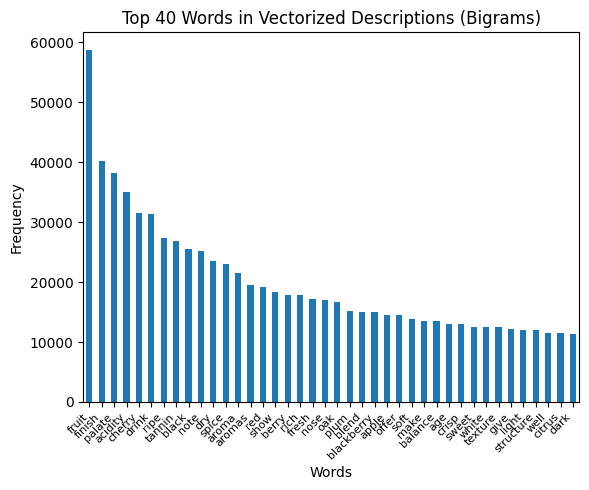

In [17]:
# Plotting the top 40 most relevant words

import matplotlib.pyplot as plt

# Calculate the sum of occurrences for each word
word_frequencies = descriptions_vectorized_n_gram.sum(axis=0)

# Create DataFrame
word_frequencies_df = pd.DataFrame(word_frequencies, columns=['Frequency'])

# Sort by frequency in descending order
word_frequencies_df = word_frequencies_df.sort_values(by='Frequency', ascending=False)

# Plot top 40 words
top_words = 40
plt.figure(figsize=(12, 100))
word_frequencies_df.head(top_words).plot(kind='bar', legend=None)
plt.title(f'Top {top_words} Words in Vectorized Descriptions (Bigrams)')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.show()

In [18]:
descriptions_vectorized_n_gram_results = list(descriptions_vectorized_n_gram.columns)

In [20]:
# Checking LDA to see what relevant topics we can get

from sklearn.decomposition import LatentDirichletAllocation


n_components = 20
lda_model = LatentDirichletAllocation(n_components=n_components)

# Fit the LDA on the vectorized documents
lda_model.fit(descriptions_vectorized_n_gram)

LatentDirichletAllocation(n_components=20)

In [21]:
document_topic_mixture = lda_model.transform(descriptions_vectorized_n_gram)
topic_word_mixture = pd.DataFrame(
    lda_model.components_,
    columns = count_vectorizer_n_gram.get_feature_names_out()
)

In [23]:
def print_topics(lda_model, vectorizer, top_words):
    # 1. TOPIC MIXTURE OF WORDS FOR EACH TOPIC
    topic_mixture = pd.DataFrame(
        lda_model.components_,
        columns = count_vectorizer_n_gram.get_feature_names_out()
    )

    # 2. FINDING THE TOP WORDS FOR EACH TOPIC
    ## Number of topics
    n_components = topic_mixture.shape[0]

    ## Top words for each topic
    for topic in range(n_components):
        print("-"*10)
        print(f"For topic {topic}, here are the the top {top_words} words with weights:")

        topic_df = topic_mixture.iloc[topic]\
            .sort_values(ascending = False).head(top_words)

        print(round(topic_df,3))

In [24]:
print_topics(lda_model, count_vectorizer_n_gram, 6)


----------
For topic 0, here are the the top 6 words with weights:
white      7780.565
fruit      4754.121
palate     4203.940
offer      3674.009
flower     3638.021
acidity    3160.104
Name: 0, dtype: float64
----------
For topic 1, here are the the top 6 words with weights:
palate    10019.502
finish     7380.260
apple      7175.118
nose       6760.032
lemon      5189.603
fresh      4559.295
Name: 1, dtype: float64
----------
For topic 2, here are the the top 6 words with weights:
fruit          7854.726
black          6905.722
black fruit    4463.049
dark           3377.229
dense          3323.223
tannins        3217.854
Name: 2, dtype: float64
----------
For topic 3, here are the the top 6 words with weights:
cherry          9741.079
palate          8211.671
black           8015.974
tannin          7422.017
black cherry    6199.233
offer           4433.343
Name: 3, dtype: float64
----------
For topic 4, here are the the top 6 words with weights:
oak        8136.233
fruit      7384

After checking the most releveant words and topics, the goal is to group them into different categories, which will be used to the user selection. I decided to group them based on aromas, body of the wine, sweetness/dryness and texture.

In [25]:
# Aromas
fruity = ["apple", 'apricot', 'berry', 'berry fruit', 'black cherry', 'black currant', 'black fruit', 'blackberry', 'blueberry', 'cassis', 'cherry', "citrus", 'cranberry', 'currant', 'fruit', 'fruity', 'grape', 'grapefruit', 'lemon', 'lime', 'melon', 'orange', 'pineapple', 'raspberry', 'red berry', 'red fruit', "peach", "pear", "raspberry", "blueberry", "strawberry", "orange", "lime", "plum", "fruity", "fruit flavor", "tangerine"]
spicy = ['anise', 'black pepper', 'cinnamon', 'pepper', 'licorice', 'spice', 'spicy', 'clove', 'peppery']
herbal = ['green', 'herb', 'herbs', 'herbal', 'violet']
oaky = ['almond', 'vanilla', 'cedar', 'earth', 'earthy', 'leather', 'oak', 'wood', 'toasty', 'oaky', 'caramel', 'cola', 'roast', 'meat', 'smoky', 'smoke', 'tobacco', 'bake', 'savory']
chocolate_coffee = ['chocolate', 'coffee', 'espresso', 'mocha']
floral =  ['floral', 'flower', 'blossom', 'violet']
# Body
light_bodied = ["light", "lightly", "smooth"]
medium_bodied = ['medium', 'mediumbodied', 'juicy']
full_bodied = ['fullbodied', 'full', 'dense', 'rich', 'richness', 'bold', 'thick', 'chewy', 'lush', 'syrah']
# Texture
soft_texture = ['soft', 'mature']
creamy_texture = ['creamy']
structured_texture = ['structure', 'tannic']
silky_texture = ['silky', 'velvety', 'lush']
# Sweetness
sweet = ['sweet', 'rich', 'honey', 'candy', 'jammy', 'sweetness', 'sugar']
dry = ['acid', 'acidity', 'dry', 'off-dry', 'tart', 'mineral', 'crisp', 'bitter', 'minerality', 'refresh', 'tangy', 'zest', 'zesty', 'savory', 'bright', 'stone']


In [26]:
# Based on the cell above, adding extra columns and encoding them so that we can categorize each wine based on aromas, body, sweetness/dryness

def encode_columns(row):
    # Sweet or dry
    sweet_words = [keyword for keyword in row['processed_description'] if keyword in sweet]
    dry_words = [keyword for keyword in row['processed_description'] if keyword in dry]

    if len(sweet_words) > len(dry_words):
        sweet_wine, dry_wine = 1, 0
    if len(dry_words) > len(sweet_words):
        sweet_wine, dry_wine = 0, 1
    else:
        sweet_wine, dry_wine = 0, 0

    # Aromas

    fruity_aroma = 1 if any(keyword in row['processed_description'] for keyword in fruity) else 0
    spicy_aroma = 1 if any(keyword in row['processed_description'] for keyword in spicy) else 0
    herb_aroma = 1 if any(keyword in row['processed_description'] for keyword in herbal) else 0
    oak_aroma = 1 if any(keyword in row['processed_description'] for keyword in oaky) else 0
    chocolate_aroma = 1 if any(keyword in row['processed_description'] for keyword in chocolate_coffee) else 0
    floral_aroma = 1 if any(keyword in row['processed_description'] for keyword in floral) else 0


    # Encoding body_of_the_wine based on keywords
    body_light = 1 if any(keyword in row['processed_description'] for keyword in light_bodied) else 0
    body_medium = 1 if any(keyword in row['processed_description'] for keyword in medium_bodied) else 0
    body_full = 1 if any(keyword in row['processed_description'] for keyword in full_bodied) else 0

    # Encoding the texture

    soft_tex = 1 if any(keyword in row['processed_description'] for keyword in soft_texture) else 0
    creamy_tex = 1 if any(keyword in row['processed_description'] for keyword in creamy_texture) else 0
    structured_tex = 1 if any(keyword in row['processed_description'] for keyword in structured_texture) else 0
    silky_tex = 1 if any(keyword in row['processed_description'] for keyword in silky_texture) else 0

    return pd.Series([sweet_wine, dry_wine, fruity_aroma, spicy_aroma, herb_aroma, oak_aroma, floral_aroma,chocolate_aroma, body_light, body_medium, body_full, soft_tex, creamy_tex, structured_tex, silky_tex])

# Apply the encoding function to create new columns
df[['dry_wine','sweet_wine','fruity_aroma', 'spicy_aroma', 'herb_aroma', 'oak_aroma', 'chocolate_aroma', 'floral_aroma','body_light', 'body_medium', 'body_full', 'soft_tex', 'creamy_tex', 'structured_tex','silky_tex']] = df.apply(encode_columns, axis=1)


Assigning the type of wine to each row

In [ ]:
# The orginal dataset does not contain explicit information about the type of wine. However, we want to have it so that the user can filter their preferred selection. Therefore,
# 5 lists of wines were created (red, white, rose, sparkling and dessert), which contain the wine variety

In [27]:
red_wines = ['portuguese red','tinta de toro', 'austrian red blend','tinta cao','tinto del pais','sptburgunder','cabernet sauvignonmerlotshiraz','tannatmerlot',
'malbeccarmnre','bastardo','malbec blend','syrahmerlot','touriga franca','merlotcabernet','carienagarnacha','cabernet sauvignoncarmenre','vidadillo','malbeccabernet franc','merlottannat','coda di volpe','blaufrnkisch','shirazmalbec','freisa',
 'provence red blend','duras','pinotagemerlot', 'cabernet sauvignonmalbec','franconia','rufete','tempranillosyrah','traminer','carignansyrah','nebbiolo','aglianico','cabernet francmerlot',
 'cabernet sauvignonshiraz','gamay','malbectempranillo','rhnestyle red blend','tintilia','vinho','aragons','sangiovese grosso','garnachacabernet','garnachamonastrell','kotsifali','primitivo',
 'shiraz','shirazroussanne','nerello cappuccio','cabernetmalbec','colorino','syrahmourvdre','merlotargaman','bobal','syrahviognier','counoise','grenache blend','syrahbonarda',
 'vespolina','mavrodaphne','pinot noirgamay', 'lambrusco','red blend','bobalcabernet sauvignon','rosado','cabernet blend','syrahcabernet sauvignon', 'st vincent',
 'mavrotragano','garnachasyrah','grenacheshiraz','gsm','dornfelder', 'raboso','uva di troia','malbec','tinta negra mole','grignolino','petite sirah','pignolo','castelo',
 'mavrokalavryta','centesimino','malbectannat','incrocio manzoni','tannatsyrah','chelois','pallagrello','barbera','carmenresyrah','carinea','pinot nero',
 'prugnolo gentile','touriga nacional','claret','poulsard','jaen','mandilaria','tempranillo','zweigelt','bombino nero','rebo','mataro','maturana',
 'tinta madeira','tinta amarela','cabernet franc','shirazcabernet','tannatcabernet franc','shirazgrenache','cabernet sauvignoncabernet franc','durella','tinta barroca','merlotsyrah',
 'prieto picudo', 'shirazmourvdre','syrah','tannat','graciano','passerina','malbecpetit verdot','teroldego rotaliano','barberanebbiolo','garnachatempranillo','nero davola',
 'syrahgrenache','lagrein','tinto fino','aligot','carmenre','malbeccabernet sauvignon','nerello mascalese','pugnitello',
 'lambrusco di sorbara','tempranillomerlot','canaiolo','shirazcabernet sauvignon','alicante','grolleau','cabernet sauvignonsyrah','marselan','pinotage','brachetto','merlotcabernet sauvignon',
 'nasco','frappato','negroamaro','shiraztempranillo','montepulciano','merlotmalbec','sangiovesesyrah','pinot noirsyrah','monastrellsyrah','nascetta','garnachacariena','carcajolu',
 'negrette','cabernet','trollinger','cabernet sauvignon','casavecchia','garnacha blend','molinara','monastrell','vermentino nero','bovale','cabernet merlot','sirica',
 'tinta roriz','marzemino','merlot','xinomavro','syrahmalbec','carignan','cabernet sauvignontempranillo','saperavi','alicante bouschet','carignangrenache','merlotgrenache',
 'trepat','petite verdot','syrahtempranillo','zinfandel','tinta fina','sangiovese cabernet','pigato','bonarda','corvina rondinella molinara','baga','grenachemourvdre','chambourcin',
 'petit verdot','baco noir','sangiovesecabernet sauvignon','shirazviognier','aragonez','cabernet franclemberger','charbono','babosa negro','groppello','dolcetto',
 'meritage','trincadeira','argaman','merlotshiraz','bagatouriga nacional','nero di troia','cabernetsyrah','norton','loin de loeil','cinsault','merlotcabernet franc','durif','cabernetshiraz',
 'agiorgitiko','piedirosso','susumaniello','aleatico','cabernet pfeffer','cabernet franccarmenre','cabernet franccabernet sauvignon','gaglioppo','listn negro','malbeccabernet','ciliegiolo',
 'malbecsyrah','malbecbonarda','nielluciu','refosco','ruch','mavroudi','mondeuse','prunelard','grenachecarignan','carignano','timorasso','corvina','sangiovese','tinta francisca',
 'cabernet sauvignonmerlot','tempranillocabernet sauvignon','tempranilloshiraz','pinot noir','touriga nacionalcabernet sauvignon','cabernet sauvignonbarbera','carignane','garnacha tintorera','malvasia nera','syrahpetite sirah',
 'cabernet sauvignonsangiovese','gamay noir','bordeauxstyle red blend','grenachesyrah','syrahcabernet franc','tempranillogarnacha','magliocco',
 'tinto velasco','frburgunder','syrahcarignan','cannonau','cesanese','monastrellpetit verdot','syrahcabernet','tinta del pais','mourvdre','cabernet sauvignon grenache','syrahgrenacheviognier','tempranillo blanco','grenache',
 'pallagrello nero','lambrusco grasparossa','cesanese daffile','schiava','cabernet francmalbec','grenache noir','menca','merlotpetite verdot', 'parraleta','syrahpetit verdot','mourvdresyrah',
 'mauzac','tannatcabernet','trousseau','carmenrecabernet sauvignon','tempranillo blend','sagrantino','mazuelo','malbecmerlot', 'francisa']

In [28]:
white_wines = ['clairette','muskat', 'malagousia','pinot blancviognier','neuburger','garnacha','pas','torbato','forcall','apple','zibibbo','gelber traminer','elbling','roter veltliner',
 'gros and petit manseng','chardonnaysauvignon','orange muscat','assyrtiko','xarello','roviello','pinot grigiosauvignon blanc','glera','anto vaz','inzolia',
'gragnano','madeleine angevine','alvarelho','verdejoviura','tocai','trousseau gris','albana','cayuga','muscatel',
 'moscatel','gros manseng', 'macabeo','gouveio','mantonico','white riesling','jampal','auxerrois','rkatsiteli', 'perricone','rieslingchardonnay','muscat of alexandria','sauvignon blancverdejo',
 'malvasiaviura','pinot blancchardonnay','pinot bianco','moscato di noto','abouriou','vidal','ondenc','colombard','chardonnaysauvignon blanc',
 'chenin blancsauvignon blanc','chardonel','vernaccia','thrapsathiri','airen','dafni','hondarrabi zuri','blauburgunder','muscat dalexandrie','alsace white blend','alvarinho','savagnin',
 'furmint','white port','provence white blend','asprinio','manzoni','vignoles','moscatel grado','tokay','sideritis','meseguera','braucol','pinotchardonnay',
 'roussannemarsanne','marawi','monica','vitovska','malvasia','pallagrello bianco','chardonnayriesling','grillo','viognier','alfrocheiro','vidal blanc','schwartzriesling','nosiola',
 'assyrtico','trebbiano','smillon','cortese','melon','sylvaner','catalanesca','nero davola','pinot auxerrois','gewrztraminer','cercial',
 'muscadelle','favorita','sauvignon blancchardonnay','gros plant','grenache blanc', 'gelber muskateller', 'bical','moscato giallo','malagouzia','muscat canelli','semillonchardonnay',
 'chardonnaypinot blanc','altesse','muscat blanc','chardonnaysemillon','silvaner','viogniergrenache blanc','verdicchio','chardonnaypinot gris','athiri',
 'cococciola','loin de loeil','colombardsauvignon blanc','sauvignonsmillon','orangetraube','chasselas','morillon','ferno pires','rosenmuskateller','sauvignon gris',
 'macabeochardonnay', 'uvalino','verdeca','premsal','zierfandlerrotgipfler','ugni blanccolombard','folle blanche','blanc du bois','grner veltliner',
 'semillon','verduzzo','muscat blanc petits grains','pri blanc','austrian white blend','grauburgunder','tokay pinot gris',
 'roditismoschofilero','garganega','roussanne','greco bianco','ribolla gialla','viuraverdejo','muscadel','grenache gris', 'pinot grigio','fer servadou',
 'pinot meunier','picapoll','viognierchardonnay','pinot grisgewrztraminer','chancellor','colombardugni blanc','sauvignon musqu','smling',
 'malagouziachardonnay','petit manseng','malvasia istriana','grechetto','muskat ottonel','zierfandler','cdega do larinho','teroldego','palomino','st laurent','erbaluce',
 'maria gomes','loureiro','siegerrebe','carricante','marsanneviognier','ansonica','nuragus','verdosilla','chardonnay weissburgunder','trajadura','debit',
 'malvasia fina','plyto','mllerthurgau','viogniervaldigui','pinot blancpinot noir','aligot','bual','malvasia bianca','sauvignon',
 'roussannegrenache blanc','johannisberg riesling','romorantin','pecorino','avesso','trebbiano di lugana','verdelho','sciaccerellu','alvarinhochardonnay','sacy','pignoletto',
 'rolle','bombino bianco','pinot blanc','friulano','paralleda','cerceal','diamond','roter traminer','verdejo','catarratto','edelzwicker','touriga nacional blend',
 'treixadura','mansois','valvin muscat','malvasia di candia','trebbiano spoletino','ugni blanc','pansa blanca','malvar','chardonnay',
 'bordeauxstyle white blend','vermentino','savatiano','viogniergewrztraminer','sauvignon blancsemillon','tinta mida','grecanico','viura','arneis','doa blanca',
 'garnacha blanca','siria','albarossa','moscato','caprettone','chenin blancchardonnay','souso','sercial','azal','aidani','moschofilero','lemberger','viogniermarsanne',
 'viosinho','albario','verdil','verdejosauvignon blanc','petit courbu','white blend','robola','chenin blanc','insolia','moscatel de alejandra','weissburgunder',
 'gewrztraminerriesling','jacqure','vespaiolo','picpoul','encruzado','fum blanc','greco','merseguerasauvignon blanc','muskateller','roussanneviognier',
 'roditis','pinot gris','biancale','albanello','rivaner','rotgipfler','portuguese white','macabeomoscatel','chenin blancviognier','godello','silvanertraminer',
 'tocai friulano','vilana','chardonnayalbario','sauvignon blancassyrtiko','seyval blanc','sauvignon blanc','touriga','sauvignon blancchenin blanc','semillonsauvignon blanc',
 'loureiroarinto','rhnestyle white blend','fiano','chardonnayviognier','falanghina','maria gomesbical','viurachardonnay','biancolella','picolit',
 'viogniermarsanneroussanne','viognierroussanne','rabigato','riesling','verduzzo friulano ','torontel','traminette','arinto','marsanneroussanne','tinta del toro','piquepoul blanc','marsanne','rieslaner','torronts','welschriesling','rosato','kerner','turbiana']

In [29]:
rose_wines = ['rosato', 'portuguese ros', 'ros', 'marquette']

In [30]:
sparkling_wines = ['champagne blend','veltliner','lambrusco','portuguese sparkling','symphony','glera','lambrusco salamino','sparkling blend', 'prosecco']

In [31]:
dessert_wines = ['port','muscat','black monukka', 'late harvest','white port','sherry','moscato rosa', 'scheurebe','black muscat','morio muskat','sauternes','moscato',
 'moscadello','madeira blend','muscat dalexandrie','mission','muscat hamburg','souzao','torronts','valdigui','moscatel roxo','muscadine',
 'ice wine','moschofilerochardonnay','orange muscat','jacquez','pedro ximnez']

In [32]:
df['variety'] = df['variety'].str.lower()

In [47]:
df = df.dropna(subset=['variety'])

In [50]:
import re
from unidecode import unidecode

def clean_strings(input_list):

    # Step 1 & 2: Lower case each string and remove special characters
    cleaned_list = [re.sub(r'[^a-zA-Z0-9\s]', '', item) for item in input_list]

    # Step 3: Replace non-standard English letters with their standard equivalents
    cleaned_list = [unidecode(item) for item in cleaned_list]

    return cleaned_list

In [51]:
df['variety'] = clean_strings(df['variety'])

In [52]:
import numpy as np

conditions = [
    df['variety'].isin(red_wines),
    df['variety'].isin(white_wines),
    df['variety'].isin(sparkling_wines),
    df['variety'].isin(rose_wines),
    df['variety'].isin(dessert_wines)
]

# Define corresponding values
values = ['red', 'white', 'sparkling', 'rose', 'dessert']

# Create a new column based on the conditions
df['wine_type'] = np.select(conditions, values, default='Other')

In [53]:
len_rose = (df['wine_type'] == 'rose').sum()
len_red = (df['wine_type'] == 'red').sum()
len_white = (df['wine_type'] == 'white').sum()
len_sparkling = (df['wine_type'] == 'sparkling').sum()
len_dessert = (df['wine_type'] == 'dessert').sum()

print(f'The number of rose wines is {len_rose}.')
print(f'The number of red wines is {len_red}.')
print(f'The number of white wines is {len_white}.')
print(f'The number of sparkling wines is {len_sparkling}.')
print(f'The number of dessert wines is {len_dessert}.')

The number of rose wines is 3582.
The number of red wines is 78243.
The number of white wines is 43032.
The number of sparkling wines is 3862.
The number of dessert wines is 1025.


Model Training

In [55]:
df= df.rename(columns={'Unnamed: 0': 'index'})

In [59]:
# Fit the KNN model

X = df[['dry_wine', 'sweet_wine', 'fruity_aroma','spicy_aroma', 'herb_aroma', 'oak_aroma', 'chocolate_aroma','floral_aroma', 'body_light', 'body_medium', 'body_full']]
y = df['id']

neigh = KNeighborsRegressor(n_neighbors=15)
neigh.fit(X, y)

KNeighborsRegressor(n_neighbors=15)

In [60]:
test = df.iloc[[1726]][['dry_wine', 'sweet_wine', 'fruity_aroma','spicy_aroma', 'herb_aroma', 'oak_aroma', 'chocolate_aroma','floral_aroma', 'body_light', 'body_medium', 'body_full']]

neigh.kneighbors(test, n_neighbors=15, return_distance=True)

(array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]),
 array([[ 953, 1669,  342, 1228,  138,  301,  659, 1298,   62,  104,  175,
          202,  415,  731,   19]]))

In [62]:
# Getting the datapoints of the features of one of the neighbors
neighbor = df.iloc[[953]][['dry_wine', 'sweet_wine', 'fruity_aroma','spicy_aroma', 'herb_aroma', 'oak_aroma', 'chocolate_aroma','floral_aroma', 'body_light', 'body_medium', 'body_full']]

In [70]:
# Creeating a function to try out the KNN model and check what neighbours we get for a specific input wine (random row)

input_row = np.random.randint(0, 55350)

def match_type(x: int):
    '''Input the index of a wine and returns a dataframe whose rows are the
    wine's nearest neighbors whose wine type matches our original wine'''
    # Finding the nearest neighbors
    input = df.iloc[[x]][['dry_wine', 'sweet_wine', 'fruity_aroma','spicy_aroma', 'herb_aroma', 'oak_aroma',
                                   'chocolate_aroma','floral_aroma', 'body_light', 'body_medium', 'body_full']]

    nearest_neighbors = neigh.kneighbors(input, n_neighbors=15, return_distance=True)
    neighs = nearest_neighbors[1][0].tolist()

    # Matching the wine type
    wine_type = df.iloc[x]['wine_type']

    neighbors = df.iloc[neighs]
    matching_neighbors = neighbors[neighbors['wine_type'] == wine_type]

    return matching_neighbors

In [68]:
def describe(x: pd.DataFrame):
    '''Returns the descriptions of a df of wines'''
    for i in range(len(x)):
        print(f'Wine number {i+1}:\n')
        print(f"This is a {x.iloc[i]['variety']} from {x.iloc[i]['country']}\n")
        print(x.iloc[i]['description'])
        print('-'*100)

In [69]:
describe(match_type(input_row))

Wine number 1:

This is a pinot nero from Italy

Sleek and polished, this opens with aromas of raspberry preserve and rose petal. The elegant palate offers crushed red berry with hints of green tea, cinnamon and a mineral note alongside firm acidity and supple tannins.
----------------------------------------------------------------------------------------------------
Wine number 2:

This is a cabernet sauvignon from US

Discovery Vineyard Cab makes up most of this wine, with just a splash of Champoux vineyard Franc to fill it out. Very pretty, very focused aromas of spice box, red and black fruit and herb are followed by a fruit-forward, shamelessly appealing yet still elegant, balanced palate that puts a premium on purity, with a well integrated structure surrounding it all.
----------------------------------------------------------------------------------------------------
Wine number 3:

This is a malbec from US

All varietal, this wine offers unique aromas of toast, fig, dried her

Now checking what wine predictions we get based on the input features we give, i.e. the preferences selected by a potential user

In [72]:
# We trained the model with 11 input features. In the following example we want to predict a wine that is sweet, fruity and floral. Based on the encoding, we set as 1
# the features we want in a wine.
# This si the order: 'dry_wine', 'sweet_wine', 'fruity_aroma','spicy_aroma', 'herb_aroma', 'oak_aroma', 'chocolate_aroma','floral_aroma', 'body_light', 'body_medium', 'body_full'

X_predict = np.array([[0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0]])

neigh.predict(X_predict)

/Users/mercedes/.pyenv/versions/3.10.6/envs/wine_project/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([45224.93333333])

In [73]:
neigh.kneighbors(X_predict)

/Users/mercedes/.pyenv/versions/3.10.6/envs/wine_project/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


(array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]]),
 array([[72700, 81186, 33600, 77620, 23420, 29447, 61688, 75807, 15344,
         21700, 23052, 27674, 30814, 68989, 35333]]))

In [ ]:
import pickle

# Export Pipeline as pickle file
with open("model.pkl", "wb") as file:
    pickle.dump(neigh, file)